<a href="https://colab.research.google.com/github/tcapelle/solar_seg/blob/master/Solar_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import fastai
from fastai.vision import *

In [2]:
from fastai.utils.show_install import *
show_install()



```text
=== Software === 
python        : 3.6.7
fastai        : 1.0.45
fastprogress  : 0.1.19
torch         : 1.0.1.post2
nvidia driver : 410.79
torch cuda    : 10.0.130 / is available
torch cudnn   : 7402 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 11441MB | Tesla K80

=== Environment === 
platform      : Linux-4.14.79+-x86_64-with-Ubuntu-18.04-bionic
distro        : #1 SMP Wed Dec 19 21:19:13 PST 2018
conda env     : Unknown
python        : /usr/bin/python3
sys.path      : 
/env/python
/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/usr/local/lib/python3.6/dist-packages
/usr/lib/python3/dist-packages
/usr/local/lib/python3.6/dist-packages/IPython/extensions
/root/.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnostics can be installed with:
pip install distro
Once installed, re

In [30]:
!rm -r solar_seg/
!git clone https://github.com/tcapelle/solar_seg/

Cloning into 'solar_seg'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 6289 (delta 30), reused 91 (delta 26), pack-reused 6188
Receiving objects: 100% (6289/6289), 358.54 MiB | 42.93 MiB/s, done.
Resolving deltas: 100% (67/67), done.
Checking out files: 100% (7078/7078), done.


In [0]:
path = Path('solar_seg/')
path_lbl = path/'train_masks'
path_img = path/'train_images'

In [47]:
fnames = get_image_files(path_lbl)
fnames = [path_img/fname.name for fname in fnames]
fnames

[PosixPath('solar_seg/train_images/01285.png'),
 PosixPath('solar_seg/train_images/01283.png'),
 PosixPath('solar_seg/train_images/01298.png'),
 PosixPath('solar_seg/train_images/01274.png'),
 PosixPath('solar_seg/train_images/00556.png'),
 PosixPath('solar_seg/train_images/01280.png'),
 PosixPath('solar_seg/train_images/00550.png'),
 PosixPath('solar_seg/train_images/01269.png'),
 PosixPath('solar_seg/train_images/00554.png'),
 PosixPath('solar_seg/train_images/01272.png'),
 PosixPath('solar_seg/train_images/01271.png'),
 PosixPath('solar_seg/train_images/00544.png'),
 PosixPath('solar_seg/train_images/01279.png'),
 PosixPath('solar_seg/train_images/00547.png'),
 PosixPath('solar_seg/train_images/01284.png'),
 PosixPath('solar_seg/train_images/00552.png'),
 PosixPath('solar_seg/train_images/01287.png'),
 PosixPath('solar_seg/train_images/01290.png'),
 PosixPath('solar_seg/train_images/00545.png'),
 PosixPath('solar_seg/train_images/01286.png'),
 PosixPath('solar_seg/train_images/01268

In [48]:
lbl_names = get_image_files(path_lbl)
lbl_names

[PosixPath('solar_seg/train_masks/01285.png'),
 PosixPath('solar_seg/train_masks/01283.png'),
 PosixPath('solar_seg/train_masks/01298.png'),
 PosixPath('solar_seg/train_masks/01274.png'),
 PosixPath('solar_seg/train_masks/00556.png'),
 PosixPath('solar_seg/train_masks/01280.png'),
 PosixPath('solar_seg/train_masks/00550.png'),
 PosixPath('solar_seg/train_masks/01269.png'),
 PosixPath('solar_seg/train_masks/00554.png'),
 PosixPath('solar_seg/train_masks/01272.png'),
 PosixPath('solar_seg/train_masks/01271.png'),
 PosixPath('solar_seg/train_masks/00544.png'),
 PosixPath('solar_seg/train_masks/01279.png'),
 PosixPath('solar_seg/train_masks/00547.png'),
 PosixPath('solar_seg/train_masks/01284.png'),
 PosixPath('solar_seg/train_masks/00552.png'),
 PosixPath('solar_seg/train_masks/01287.png'),
 PosixPath('solar_seg/train_masks/01290.png'),
 PosixPath('solar_seg/train_masks/00545.png'),
 PosixPath('solar_seg/train_masks/01286.png'),
 PosixPath('solar_seg/train_masks/01268.png'),
 PosixPath('s

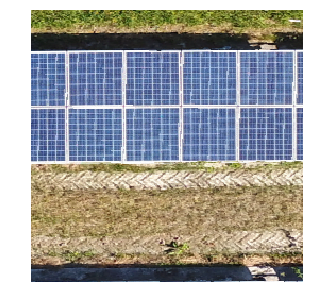

In [34]:
img_f = fnames[5]
img = open_image(img_f)
img.show(figsize=(5,5))

In [0]:
get_y_fn = lambda x: path_lbl/f'{x.stem}{x.suffix}'

In [36]:
get_y_fn(img_f)

PosixPath('solar_seg/train_masks/01280.png')

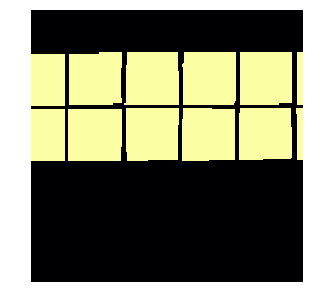

In [37]:
mask = open_mask(get_y_fn(img_f), div=True)
mask.show(figsize=(5,5), alpha=1, cmap = 'inferno')

In [38]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([256, 256]), tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]]))

In [0]:
size = src_size//2
bs=64

In [0]:
class MySegmentationLabelList(SegmentationLabelList):
  def open(self, fn): return open_mask(fn, div=True)

class MySegmentationItemList(ImageItemList):
    "`ItemList` suitable for segmentation tasks."
    _label_cls,_square_show_res = MySegmentationLabelList,False

In [49]:

MySegmentationItemList(fnames)

MySegmentationItemList (64 items)
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
Path: .

In [0]:
def get_data(sz, bs):
  src = (MySegmentationItemList(fnames)
       .random_split_by_pct(.2)
       .label_from_func(get_y_fn, classes=['background','solar_module']))
  data = (src.transform(get_transforms(flip_vert=True), size=sz, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))
  return data

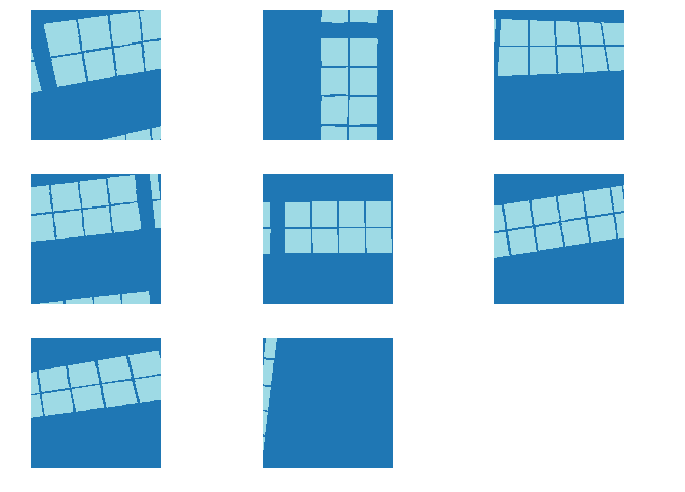

In [68]:
data = get_data(128, 8)
data.show_batch(4, figsize=(10,7), alpha=1)

In [0]:
metrics = partial(dice, iou=True)
wd = 1e-2

In [0]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.25E-05


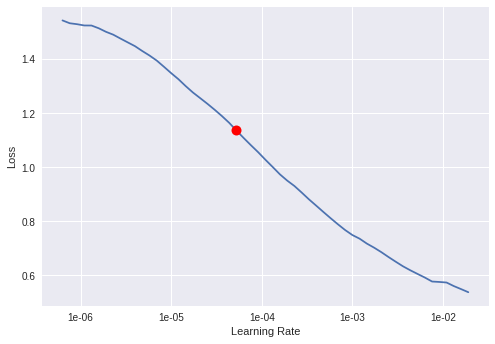

In [55]:
learn.lr_find(); learn.recorder.plot()

In [71]:
learn.fit_one_cycle(12, 5e-5)

epoch,train_loss,valid_loss,dice
1,1.237848,0.891811,0.313512
2,1.001400,0.656207,0.163744
3,0.822734,0.433814,0.708075
4,0.667433,0.230577,0.820544
5,0.546985,0.170651,0.848096
6,0.458087,0.135173,0.865148
7,0.391290,0.114398,0.881113
8,0.339644,0.109966,0.887413
9,0.298397,0.096412,0.897107
10,0.265936,0.092510,0.902297


In [72]:
learn.unfreeze()
learn.fit_one_cycle(12, slice(1e-5,1e-4))

epoch,train_loss,valid_loss,dice
1,0.093034,0.095070,0.896507
2,0.090180,0.090691,0.903115
3,0.085692,0.065098,0.932414
4,0.090321,0.094728,0.909497
5,0.093252,0.076836,0.918180
6,0.089024,0.054363,0.945740
7,0.082681,0.048899,0.950244
8,0.076818,0.045721,0.955117
9,0.072802,0.045373,0.956054
10,0.069467,0.043587,0.957310


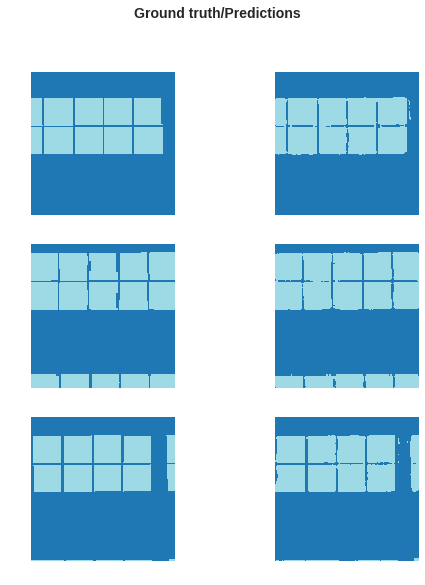

In [73]:
learn.show_results(rows=3, figsize=(8,9), alpha=1)

In [0]:
learn.data = get_data(256, 8)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06


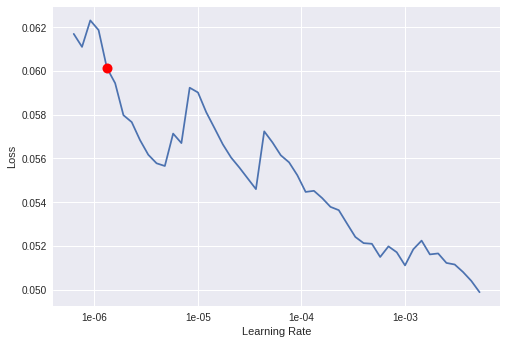

In [76]:
learn.freeze()
learn.lr_find(); learn.recorder.plot()

In [77]:
learn.freeze()
learn.fit_one_cycle(12, 1e-6)

epoch,train_loss,valid_loss,dice
1,0.056243,0.044716,0.956240
2,0.055906,0.045250,0.955963
3,0.055982,0.045078,0.956106
4,0.053752,0.044526,0.956593
5,0.053697,0.043907,0.957145
6,0.052471,0.043305,0.957636
7,0.051429,0.043123,0.957822
8,0.052249,0.043026,0.957705
9,0.051186,0.042837,0.957908
10,0.051574,0.042892,0.957826


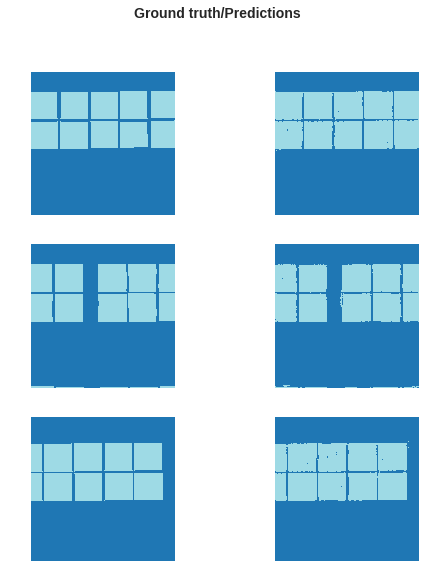

In [78]:
learn.show_results(rows=3, figsize=(8,9), alpha=1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-05


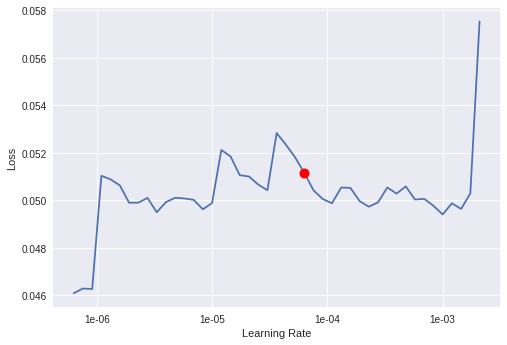

In [79]:
learn.unfreeze()
learn.lr_find(); learn.recorder.plot()

In [80]:
learn.fit_one_cycle(12, 1e-5)

epoch,train_loss,valid_loss,dice
1,0.049034,0.042233,0.958565
2,0.049593,0.040360,0.959699
3,0.047489,0.040884,0.959109
4,0.046478,0.039919,0.959522
5,0.045445,0.036745,0.961349
6,0.046816,0.037937,0.960420
7,0.045645,0.034980,0.962583
8,0.044596,0.034497,0.962815
9,0.044642,0.035204,0.962326
10,0.043600,0.035147,0.962359


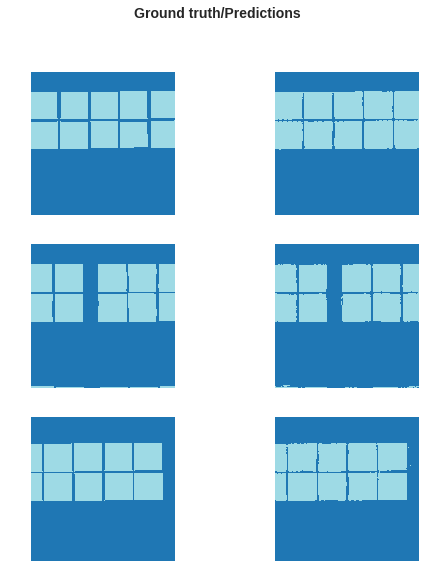

In [81]:
learn.show_results(rows=3, figsize=(8,9), alpha=1)